# Hands-on Exercise CLASS Module

In [37]:
!pip install --user mlxtend

Traceback (most recent call last):
  File "C:\Users\15139\Anaconda3\Scripts\pip-script.py", line 10, in <module>
    sys.exit(main())
TypeError: 'module' object is not callable


In [1]:
import numpy as np

#Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

#Classification Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Ensemble Methods
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import AdaBoostClassifier

#Mlxtend for visualizing classification decision boundaries
from mlxtend.plotting import plot_decision_regions


In [39]:
#Mlxtend for visualizing classification decision boundaries
!python -m pip install --user --upgrade pip

Requirement already up-to-date: pip in c:\users\15139\appdata\roaming\python\python37\site-packages (19.3.1)


In [40]:
!python -m pip install --user mlxtend

In [2]:
# Generating Data1

np.random.seed(100)

a = np.random.multivariate_normal([2,2],[[0.5,0], [0,0.5]], 200)
b = np.random.multivariate_normal([4,4],[[0.5,0], [0,0.5]], 200)

Data1_X = np.vstack((a,b))
Data1_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)


# Generating Data2

np.random.seed(100)

a1 = np.random.multivariate_normal([2,2],[[0.25,0], [0,0.25]],200)
a2 = np.random.multivariate_normal([2,4],[[0.25,0], [0,0.25]],200)
a3 = np.random.multivariate_normal([4,2],[[0.25,0], [0,0.25]],200)
a4 = np.random.multivariate_normal([4,4],[[0.25,0], [0,0.25]],200)

Data2_X = np.vstack((a1,a4,a2,a3))
Data2_Y = np.hstack((np.ones(400).T,np.zeros(400).T)).astype(int)


# Generating Data3

np.random.seed(100)

a1 = np.random.uniform(4,6,[200,2])
a2 = np.random.uniform(0,10,[200,2])

Data3_X = np.vstack((a1,a2))
Data3_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)


# Generating Data4

np.random.seed(100)

Data4_X = np.random.uniform(0,12,[500,2])
Data4_Y = np.ones([500]).astype(int)
Data4_Y[np.multiply(Data4_X[:,0],Data4_X[:,0]) + np.multiply(Data4_X[:,1],Data4_X[:,1]) - 100 < 0 ] = 0

### 1. Decision Tree

Use __Data3__ to answer the following questions.

<span style="color:red">**Question 1a:** </span> Compute and print the 10-fold cross-validation accuracy using decision tree classifiers with max_depth = 2,4,6,8,10, and 50. 

In [12]:
dt_2 = DecisionTreeClassifier(max_depth=2)
dt_2_scores = cross_val_score(dt_2, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print (dt_2_scores)

[0.8   0.9   0.9   0.875 0.925 0.875 0.9   0.85  0.85  0.875]


In [19]:
[dt_2_scores.mean(), dt_2_scores.std()]

[0.875, 0.03354101966249685]

In [13]:
dt_4 = DecisionTreeClassifier(max_depth=4)
dt_4_scores = cross_val_score(dt_4, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print (dt_4_scores)

[0.95  0.975 0.975 0.975 1.    1.    0.975 0.925 0.975 0.95 ]


In [20]:
[dt_4_scores.mean(), dt_4_scores.std()]

[0.97, 0.021794494717703363]

In [14]:
dt_6 = DecisionTreeClassifier(max_depth=6)
dt_6_scores = cross_val_score(dt_6, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print (dt_6_scores)

[0.95  0.975 0.975 0.975 1.    1.    0.95  0.925 0.975 0.95 ]


In [21]:
[dt_6_scores.mean(), dt_6_scores.std()]

[0.9674999999999999, 0.0225]

In [15]:
dt_8 = DecisionTreeClassifier(max_depth=8)
dt_8_scores = cross_val_score(dt_8, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print (dt_8_scores)

[0.95  0.975 0.95  0.95  1.    0.975 0.9   0.875 0.975 0.975]


In [22]:
[dt_8_scores.mean(), dt_8_scores.std()]

[0.9524999999999999, 0.03614208073700239]

In [16]:
dt_10 = DecisionTreeClassifier(max_depth=10)
dt_10_scores = cross_val_score(dt_10, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print (dt_10_scores)

[0.925 0.975 0.95  0.95  1.    0.975 0.925 0.925 0.95  0.925]


In [23]:
[dt_10_scores.mean(), dt_10_scores.std()]

[0.95, 0.024999999999999977]

In [17]:
dt_50 = DecisionTreeClassifier(max_depth=2)
dt_50_scores = cross_val_score(dt_50, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print (dt_50_scores)

[0.8   0.9   0.9   0.875 0.925 0.875 0.9   0.85  0.85  0.9  ]


In [24]:
[dt_50_scores.mean(), dt_50_scores.std()]

[0.8775000000000001, 0.034369317712168806]

<span style="color:red">**Question 1b:** </span> For what values of max_depth did you observe the lowest accuracy? What is this phenomenon called?

<span style="color:green">**Answer:** </span>  Looking at the mean values, it can be observed that the accuracy is low when max_depth is either 2 (small) or 50 (large). <br />Choosing a large max_depth value can cause the problem of over-fitting and small value of max_depth can make the model a little too flexible and generic making it under-fitting

<span style="color:red">**Question 1c:** </span> What accuracy did you observe for max depth=50? What is the difference between this accuracy and the highest accuracy? What is this phenomenon called?

<span style="color:green">**Answer:** </span> The mean accuracy for max_depth = 50 is around 87.75% while the highest accuracy of 97% is observed when max_depth is 4. <br />
Difference= 9.25 <br />
This phenomenon is called over-fitting problem

<span style="color:red">**Question 1d:** </span> Plot decision regions for the above decision tree models

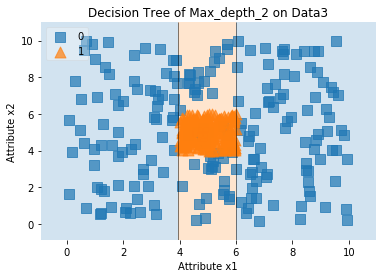

In [6]:
# Training a classifier
DT_2=DecisionTreeClassifier(max_depth=2)
DT_2.fit(Data3_X, Data3_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data3_X, y=Data3_Y, clf=DT_2, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Decision Tree of Max_depth_2 on Data3')
plt.show()

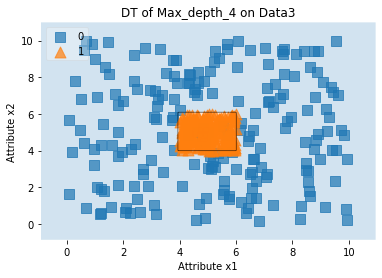

In [5]:
# Training a classifier
DT_4=DecisionTreeClassifier(max_depth=4)
DT_4.fit(Data3_X, Data3_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data3_X, y=Data3_Y, clf=DT_4, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Decision Tree of Max_depth_4 on Data3')
plt.show()

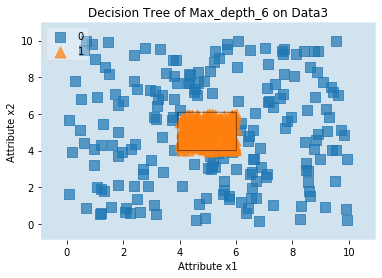

In [7]:
# Training a classifier
DT_6=DecisionTreeClassifier(max_depth=6)
DT_6.fit(Data3_X, Data3_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data3_X, y=Data3_Y, clf=DT_6, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Decision Tree of Max_depth_6 on Data3')
plt.show()

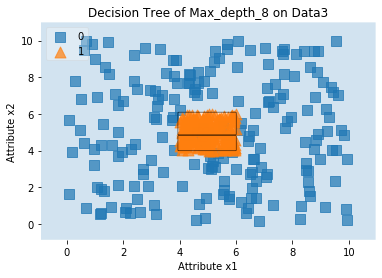

In [8]:
# Training a classifier
DT_8=DecisionTreeClassifier(max_depth=8)
DT_8.fit(Data3_X, Data3_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data3_X, y=Data3_Y, clf=DT_8, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Decision Tree of Max_depth_8 on Data3')
plt.show()

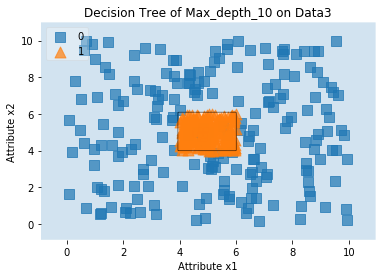

In [9]:
# Training a classifier
DT_10=DecisionTreeClassifier(max_depth=10)
DT_10.fit(Data3_X, Data3_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data3_X, y=Data3_Y, clf=DT_10, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Decision Tree of Max_depth_10 on Data3')
plt.show()

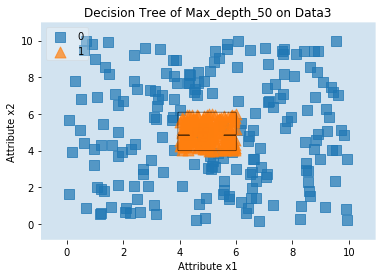

In [10]:
# Training a classifier
DT_50=DecisionTreeClassifier(max_depth=50)
DT_50.fit(Data3_X, Data3_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data3_X, y=Data3_Y, clf=DT_50, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Decision Tree of Max_depth_50 on Data3')
plt.show()

<span style="color:red">**Question 1e:** </span> Based on the decision regions, which depth is better suited for this data? Explain your reason.

<span style="color:green">**Answer:** </span> Analysing the decision boundaries and mean accuracy, it can observed that boundaries max depth 4 is better suited for this data

### 2. k Nearest Neighbor

Use __Data2__ to answer the following questions.

<span style="color:red">**Question 2a:** </span>
 Compute and print the 10-fold cross-validation accuracy for a kNN classifier with n_neighbors = 1, 5, 10, 50

In [12]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1_scores = cross_val_score(knn_1, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(knn_1_scores)

[0.925  0.8875 0.925  0.8875 0.925  0.9375 0.8875 0.925  0.9375 0.8875]


In [16]:
[knn_1_scores.mean(), knn_1_scores.std()]

[0.9125, 0.02091650066335192]

In [13]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5_scores = cross_val_score(knn_5, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(knn_5_scores)

[0.9875 0.9125 0.925  0.9125 0.95   0.95   0.8625 0.95   0.9625 0.9375]


In [17]:
[knn_5_scores.mean(), knn_5_scores.std()]

[0.9349999999999999, 0.0325]

In [14]:
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10_scores = cross_val_score(knn_10, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(knn_10_scores)

[0.9875 0.9    0.95   0.925  0.9625 0.95   0.8625 0.9375 0.9625 0.9625]


In [18]:
[knn_10_scores.mean(), knn_10_scores.std()]

[0.9400000000000001, 0.03436931771216879]

In [15]:
knn_50 = KNeighborsClassifier(n_neighbors=50)
knn_50_scores = cross_val_score(knn_50, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(knn_50_scores)

[0.9875 0.9    0.9625 0.9125 0.9625 0.9375 0.8875 0.9375 0.9625 0.9625]


In [19]:
[knn_50_scores.mean(), knn_50_scores.std()]

[0.9412499999999999, 0.030644126680328173]

<span style="color:red">**Question 2b:** </span> For what values of n_neighbors did you observe the lowest accuracy? What is this phenomenon called?

<span style="color:green">**Answer:** </span> Lowest accuracy is observed when n_neighbors value is 1. i.e we consider one nearest neighbor. <br />This phenomenon is called Under-fitting as choosing just one neighbor does not yield best results for real world data

<span style="color:red">**Question 2c:** </span>  Plot decision regions for a kNN classifier with n_neighbors = 1, 5, 10, 50

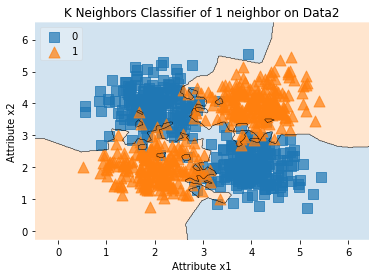

In [21]:
# Training a classifier
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(Data2_X, Data2_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data2_X, y=Data2_Y, clf=knn_1, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('K Neighbors Classifier of 1 neighbor on Data2')
plt.show()

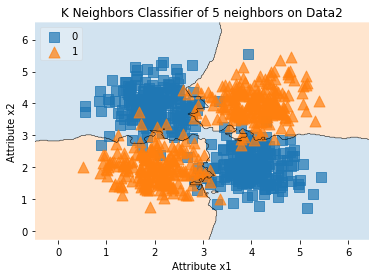

In [23]:
# Training a classifier
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(Data2_X, Data2_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data2_X, y=Data2_Y, clf=knn_5, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('K Neighbors Classifier of 5 neighbors on Data2')
plt.show()

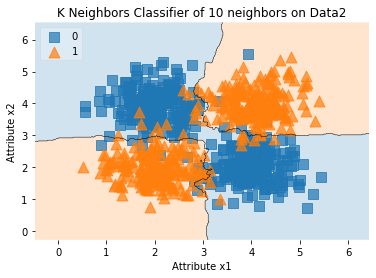

In [25]:
# Training a classifier
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(Data2_X, Data2_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data2_X, y=Data2_Y, clf=knn_10, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('K Neighbors Classifier of 10 neighbors on Data2')
plt.show()

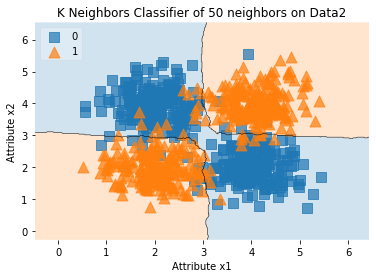

In [26]:
# Training a classifier
knn_50 = KNeighborsClassifier(n_neighbors=50)
knn_50.fit(Data2_X, Data2_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data2_X, y=Data2_Y, clf=knn_50, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('K Neighbors Classifier of 50 neighbors on Data2')
plt.show()

<span style="color:red">**Question 2d:** </span>  From the plots for __Question 2c__ what do you notice about the nature of decision boundary as the n_neighbors are increasing.

<span style="color:green">**Answer:** </span>   With the increase in the number of n_neighbors, the decision boundary becomes smoother and well defined

### 3. Naive Bayes

<span style="color:red">**Question 3a:** </span> Compute and print the 10-fold cross-validation accuracy for a NB classifier on all four datasets: Data1, Data2, Data3, Data4

In [33]:
nb_data1 = GaussianNB()
nb_data1_scores = cross_val_score(nb_data1, Data1_X, Data1_Y, cv=10, scoring='accuracy')
print (nb_data1_scores)
[nb_data1_scores.mean(),nb_data1_scores.std()]

[0.975 1.    1.    0.925 0.95  0.975 0.975 0.9   0.975 1.   ]


[0.9675, 0.03172144385112379]

In [34]:
nb_data2 = GaussianNB()
nb_data2_scores = cross_val_score(nb_data2, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print (nb_data2_scores)
[nb_data2_scores.mean(),nb_data2_scores.std()]

[0.075  0.0625 0.0125 0.0875 0.0875 0.025  0.05   0.05   0.0125 0.0375]


[0.049999999999999996, 0.026809513236909017]

In [35]:
nb_data3 = GaussianNB()
nb_data3_scores = cross_val_score(nb_data3, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print (nb_data3_scores)
[nb_data3_scores.mean(),nb_data3_scores.std()]

[1.    0.95  0.975 0.975 0.975 0.975 0.925 0.9   0.975 0.95 ]


[0.96, 0.027838821814150098]

In [36]:
nb_data4 = GaussianNB()
nb_data4_scores = cross_val_score(nb_data4, Data4_X, Data4_Y, cv=10, scoring='accuracy')
print (nb_data4_scores)
[nb_data4_scores.mean(),nb_data4_scores.std()]

[0.90196078 1.         0.98       0.98       0.98       0.96
 0.94       0.96       0.97959184 0.95918367]


[0.9640736294517807, 0.026052087140989725]

<span style="color:red">**Question 3b:** </span> State your observations on the datasets the NB algorithm performed poorly.

<span style="color:green">**Answer:** </span>  Naive Bayesian algorithm performed poorly on data 2 as it has lowest accuracy of 50% compared to other datasets

<span style="color:red">**Question 3c:** </span> Plot decision regions for a NB classifier on each of the four datasets

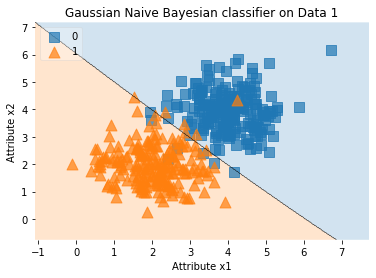

In [38]:
# Training a classifier
nb_data1 = GaussianNB()
nb_data1.fit(Data1_X, Data1_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data1_X, y=Data1_Y, clf=nb_data1, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Gaussian Naive Bayesian classifier on Data 1')
plt.show()

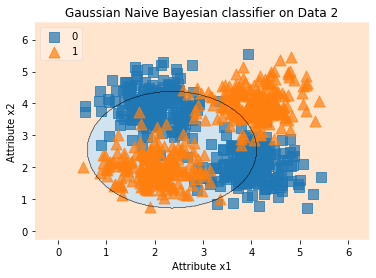

In [39]:
# Training a classifier
nb_data2 = GaussianNB()
nb_data2.fit(Data2_X, Data2_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data2_X, y=Data2_Y, clf=nb_data2, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Gaussian Naive Bayesian classifier on Data 2')
plt.show()

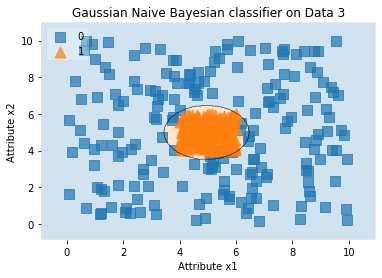

In [40]:
# Training a classifier
nb_data3 = GaussianNB()
nb_data3.fit(Data3_X, Data3_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data3_X, y=Data3_Y, clf=nb_data3, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Gaussian Naive Bayesian classifier on Data 3')
plt.show()

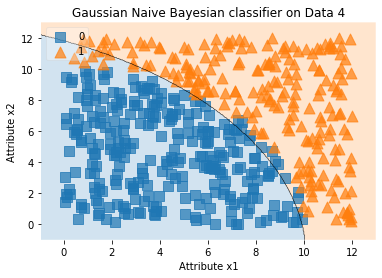

In [41]:
# Training a classifier
nb_data4 = GaussianNB()
nb_data4.fit(Data4_X, Data4_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data4_X, y=Data4_Y, clf=nb_data4, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Gaussian Naive Bayesian classifier on Data 4')
plt.show()

<span style="color:red">**Question 3d:** </span> Describe the shape of the decision boundary on all four datasets. Explain the reason.

<span style="color:green">**Answer:** </span>  

<span style="color:red">**Question 3e:** </span> Based on your plots in __Question 3c__ explain the poor performance of NB on some datasets.

<span style="color:green">**Answer:** </span>  

### 4. Support Vector Machines (Linear)

<span style="color:red">**Question 4a:** </span>  Based on the visualization of the four datasets, assess how well a linear SVM is expected to perform. Specifically, rank the datasets in the order of decreasing accuracy when a linear SVM is used. No need to compute accuracy to answer this question.

<span style="color:green">**Answer:** </span>


<span style="color:red">**Question 4b:** </span>  Compute and print the 10-fold cross-validation accuracy for a linear SVM classifier on all four datasets: Data1, Data2, Data3, Data4

In [48]:
svm_linear_data1 = SVC(C=0.5, kernel='linear')
svm_linear_data1_scores = cross_val_score(svm_linear_data1, Data1_X, Data1_Y, cv=10, scoring='accuracy')
print(svm_linear_data1_scores)
[svm_linear_data1_scores.mean(), svm_linear_data1_scores.std()]

[0.975 1.    1.    0.95  0.95  0.95  0.975 0.9   0.975 1.   ]


[0.9674999999999999, 0.02968585521759479]

In [49]:
svm_linear_data2 = SVC(C=0.5, kernel='linear')
svm_linear_data2_scores = cross_val_score(svm_linear_data2, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(svm_linear_data2_scores)
[svm_linear_data2_scores.mean(), svm_linear_data2_scores.std()]

[0.125  0.1375 0.0125 0.0875 0.2    0.2375 0.1    0.15   0.1875 0.175 ]


[0.14125000000000001, 0.06124999999999999]

In [50]:
svm_linear_data3 = SVC(C=0.5, kernel='linear')
svm_linear_data3_scores = cross_val_score(svm_linear_data3, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print(svm_linear_data3_scores)
[svm_linear_data3_scores.mean(), svm_linear_data3_scores.std()]

[0.625 0.625 0.65  0.6   0.65  0.7   0.65  0.675 0.625 0.625]


[0.6425000000000001, 0.0275]

In [51]:
svm_linear_data4 = SVC(C=0.5, kernel='linear')
svm_linear_data4_scores = cross_val_score(svm_linear_data4, Data4_X, Data4_Y, cv=10, scoring='accuracy')
print(svm_linear_data4_scores)
[svm_linear_data4_scores.mean(), svm_linear_data4_scores.std()]

[0.94117647 0.90196078 0.92       0.92       0.98       0.92
 0.94       0.92       0.95918367 0.85714286]


[0.9259463785514207, 0.03147481962633185]

<span style="color:red">**Question 4c:** </span> Rank the datasets in the decreasing order of accuracy of SVM.

<span style="color:green">**Answer:** </span> Based on the mean of the accuracies, below is the decreasing order: <br />
Data1(96.7%) > Data4(92.5%) > Data3(64.2%) > Data2(14.1%)


<span style="color:red">**Question 4d:** </span>  Plot decision regions for a linear SVM classifier on each of the four datasets

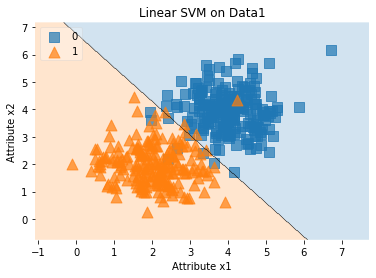

In [56]:
# Training a classifier
svm_linear_data1 = SVC(kernel='linear')
svm_linear_data1.fit(Data1_X, Data1_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data1_X, y=Data1_Y, clf=svm_linear_data1, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Linear SVM on Data1')
plt.show()

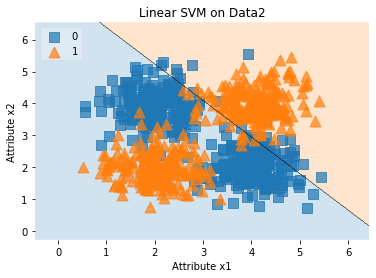

In [57]:
# Training a classifier
svm_linear_data2 = SVC(kernel='linear')
svm_linear_data2.fit(Data2_X, Data2_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data2_X, y=Data2_Y, clf=svm_linear_data2, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Linear SVM on Data2')
plt.show()

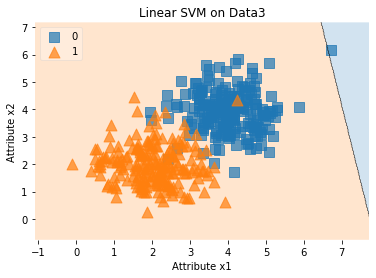

In [58]:
# Training a classifier
svm_linear_data3 = SVC(kernel='linear')
svm_linear_data3.fit(Data3_X, Data3_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data1_X, y=Data1_Y, clf=svm_linear_data3, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Linear SVM on Data3')
plt.show()

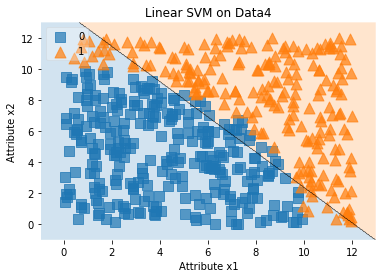

In [59]:
# Training a classifier
svm_linear_data4 = SVC(kernel='linear')
svm_linear_data4.fit(Data4_X, Data4_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data4_X, y=Data4_Y, clf=svm_linear_data4, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Linear SVM on Data4')
plt.show()

<span style="color:red">**Question 4e:** </span>Explain the reason for your observations in __Question 4c__ using observations from the above decision regions.

<span style="color:green">**Answer:** </span>


### 5. Non-linear Support Vector Machines

Use __Data2__ to answer the following questions.

<span style="color:red">**Question 5a:** </span>
Compute and print the 10-fold cross-validation accuracy for an SVM with a polynomial kernel and degree values 1, 2, and 3.

In [63]:
svm_poly_degree1 = SVC(kernel='poly',degree=1, gamma = 'auto')
svm_poly_degree1_scores = cross_val_score(svm_poly_degree1, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(svm_poly_degree1_scores)
[svm_poly_degree1_scores.mean(), svm_poly_degree1_scores.std()]

[0.125  0.1375 0.0125 0.0875 0.2    0.2375 0.1    0.15   0.1875 0.175 ]


[0.14125000000000001, 0.06124999999999999]

In [64]:
svm_poly_degree2 = SVC(kernel='poly',degree=2, gamma = 'auto')
svm_poly_degree2_scores = cross_val_score(svm_poly_degree2, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(svm_poly_degree2_scores)
[svm_poly_degree2_scores.mean(), svm_poly_degree2_scores.std()]

[0.8    0.8375 0.8875 0.85   0.9125 0.9    0.8625 0.8875 0.9125 0.8625]


[0.8712500000000001, 0.03402664397204048]

In [65]:
svm_poly_degree3 = SVC(kernel='poly',degree=3, gamma = 'auto')
svm_poly_degree3_scores = cross_val_score(svm_poly_degree3, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(svm_poly_degree3_scores)
[svm_poly_degree3_scores.mean(), svm_poly_degree3_scores.std()]

[0.825  0.875  0.8875 0.8625 0.925  0.9    0.8625 0.8875 0.8875 0.85  ]


[0.8762500000000001, 0.026487025125521375]

<span style="color:red">**Question 5b:** </span> Rank the polynomial kernels in decreasing order of accuracy.

<span style="color:green">**Answer:** </span> Based on the mean value of accuracies, below is the ranking order of polynomial kernals of various degrees:
<br /> __Degree 3 (87.6%) > Degree 2 (87.1%) > Degree 1 (14.1%)__

<span style="color:red">**Question 5c:** </span>  Plot decision regions for a polynomial kernel SVM with degree values 1, 2, and 3.

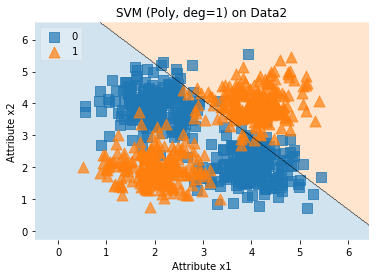

In [66]:
# Training a classifier
svm_poly_degree1 = SVC(kernel='poly', degree = 1, gamma = 'auto')
svm_poly_degree1.fit(Data2_X, Data2_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data2_X, y=Data2_Y, clf=svm_poly_degree1, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('SVM (Poly, deg=1) on Data2')
plt.show()

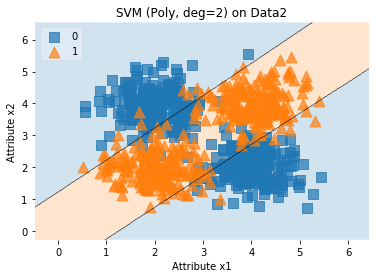

In [67]:
# Training a classifier
svm_poly_degree2 = SVC(kernel='poly', degree = 2, gamma = 'auto')
svm_poly_degree2.fit(Data2_X, Data2_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data2_X, y=Data2_Y, clf=svm_poly_degree2, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('SVM (Poly, deg=2) on Data2')
plt.show()

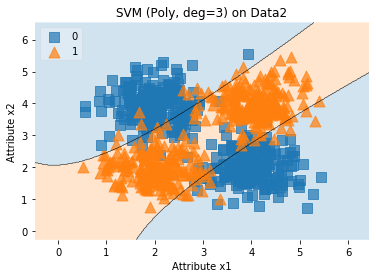

In [68]:
# Training a classifier
svm_poly_degree3 = SVC(kernel='poly', degree = 3, gamma = 'auto')
svm_poly_degree3.fit(Data2_X, Data2_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data2_X, y=Data2_Y, clf=svm_poly_degree3, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('SVM (Poly, deg=3) on Data2')
plt.show()

<span style="color:red">**Question 5d:** </span> Based on the decision regions, explain the reason for your observations in __Question 5c__.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 5e:** </span>  Compute the 10-fold cross-validation accuracy for an SVM with an RBF kernel and gamma values 0.01, 0.1, and 1.

In [70]:
svm_rbf_1 = SVC(kernel='rbf', gamma=0.01) 
svm_rbf_1_scores = cross_val_score(svm_rbf_1, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(svm_rbf_1_scores)
[svm_rbf_1_scores.mean(), svm_rbf_1_scores.std()]

[0.5    0.475  0.4125 0.475  0.4875 0.4375 0.4625 0.5    0.475  0.4375]


[0.46624999999999994, 0.027414640249326636]

In [71]:
svm_rbf_2 = SVC(kernel='rbf', gamma=0.1) 
svm_rbf_2_scores = cross_val_score(svm_rbf_2, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(svm_rbf_2_scores)
[svm_rbf_2_scores.mean(), svm_rbf_2_scores.std()]

[0.9875 0.9125 0.9375 0.9125 0.9625 0.9375 0.875  0.9375 0.9625 0.9625]


[0.9387500000000001, 0.03084740669813268]

In [72]:
svm_rbf_3 = SVC(kernel='rbf', gamma=1) 
svm_rbf_3_scores = cross_val_score(svm_rbf_3, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print(svm_rbf_3_scores)
[svm_rbf_3_scores.mean(), svm_rbf_3_scores.std()]

[1.     0.9125 0.9375 0.9375 0.9625 0.9625 0.8625 0.9375 0.9625 0.95  ]


[0.9424999999999999, 0.03455068740271312]

<span style="color:red">**Question 5f:** </span> Rank the RBF kernels in decreasing order of accuracy.

<span style="color:green">**Answer:** </span> Based on the mean value of accuracies, RBF kernals are ordered as below: <br />
__Gamma 1(94.2%) > Gamma 0.1(93.8%) > Gamma 0.01(46.6%)__


<span style="color:red">**Question 5g:** </span>  Plot decision regions for the above RBF Kernels

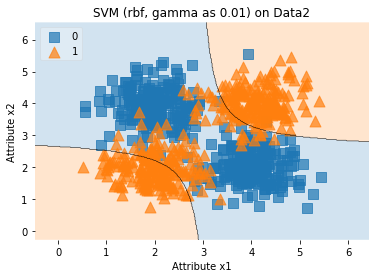

In [74]:
# Training a classifier
svm_rbf_1 = SVC(kernel='rbf', gamma = 0.01)
svm_rbf_1.fit(Data2_X, Data2_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data2_X, y=Data2_Y, clf=svm_rbf_1, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('SVM (rbf, gamma as 0.01) on Data2')
plt.show()

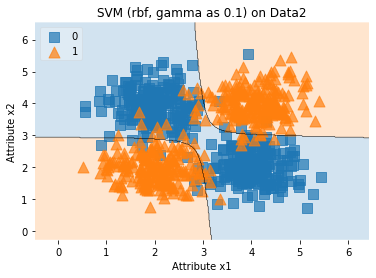

In [75]:
# Training a classifier
svm_rbf_2 = SVC(kernel='rbf', gamma = 0.1)
svm_rbf_2.fit(Data2_X, Data2_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data2_X, y=Data2_Y, clf=svm_rbf_2, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('SVM (rbf, gamma as 0.1) on Data2')
plt.show()

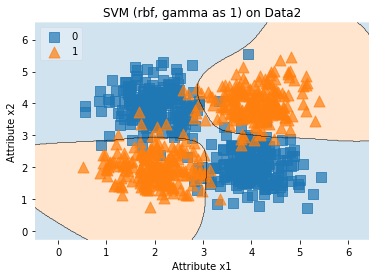

In [76]:
# Training a classifier
svm_rbf_3 = SVC(kernel='rbf', gamma = 1)
svm_rbf_3.fit(Data2_X, Data2_Y)

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# passing above parameters to the plotting function
plot_decision_regions(X=Data2_X, y=Data2_Y, clf=svm_rbf_3, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('SVM (rbf, gamma as 1) on Data2')
plt.show()

<span style="color:red">**Question 5h:** </span>  Explain the reason for your observations in __Question 5f__ from the above decision regions.

<span style="color:green">**Answer:** </span>




<span style="color:red">**Question 5i:** </span>  Between SVM with a Polynomial kernel and SVM with an RBF kernel, which one is ideally suited of Data3? Explain your reason.

<span style="color:green">**Answer:** </span>




### 6. Classification Evaluation

<span style="color:red">**Question 6a:** </span>

Run SVM classifier (with RBF kernel and gamma=0.1) on __Data2__ and compute the mean of k-fold cross-validation accuracies for cv = 3, 4, 5 and 6. Report the mean of accuracies for each choice of 'cv' and explain the reason for any differences in the mean accuracy you observe.

In [79]:
svm_rbf_cv_3 = SVC(kernel='rbf', gamma='auto') 
svm_rbf_cv_3_scores = cross_val_score(svm_rbf_cv_3, Data2_X, Data2_Y, cv=3, scoring='accuracy')
print(svm_rbf_cv_3_scores)
print('Mean for cv=3:')
[svm_rbf_cv_3_scores.mean()]

[0.91044776 0.93984962 0.92857143]
Mean for cv=3:


[0.9262896046085363]

In [80]:
svm_rbf_cv_4 = SVC(kernel='rbf', gamma='auto') 
svm_rbf_cv_4_scores = cross_val_score(svm_rbf_cv_4, Data2_X, Data2_Y, cv=4, scoring='accuracy')
print(svm_rbf_cv_4_scores)
print('Mean for cv=4:')
[svm_rbf_cv_4_scores.mean()]

[0.93  0.935 0.9   0.955]
Mean for cv=4:


[0.93]

In [81]:
svm_rbf_cv_5 = SVC(kernel='rbf', gamma='auto') 
svm_rbf_cv_5_scores = cross_val_score(svm_rbf_cv_5, Data2_X, Data2_Y, cv=5, scoring='accuracy')
print(svm_rbf_cv_5_scores)
print('Mean for cv=5:')
[svm_rbf_cv_5_scores.mean()]

[0.94375 0.9125  0.95    0.90625 0.95625]
Mean for cv=5:


[0.9337500000000001]

In [82]:
svm_rbf_cv_6 = SVC(kernel='rbf', gamma='auto') 
svm_rbf_cv_6_scores = cross_val_score(svm_rbf_cv_6, Data2_X, Data2_Y, cv=6, scoring='accuracy')
print(svm_rbf_cv_6_scores)
print('Mean for cv=6:')
[svm_rbf_cv_6_scores.mean()]

[0.97014925 0.91791045 0.95522388 0.90298507 0.93939394 0.96212121]
Mean for cv=6:


[0.9412973013719282]

<span style="color:green">**Answer:** </span> 
<br />Mean for cv=3: __92%__ 
<br />Mean for cv=4: __93%__
<br /> Mean for cv=5: __93.3%__ 
<br />Mean for cv=6: __94.1%__ 
<br />The difference in the mean accuracies is because of the different value of the cv choosen. With the increase in the number of folds, accuracy of the classifier increases

<span style="color:red">**Question 6b:** </span>

For DT, NB, kNN, Linear SVM, Polynomial Kernel SVM, and SVM with RBF kernel classifiers, compute the 30-fold crossvalidation __accuracies__ and __precision__ (use scoring='precision' when calling cross_val_score()) on __Data3__. Rank the classifiers based on accuracy and precision scores. Are the best classifiers ranked according to accuracy and precision the same? If not, explain the reason. 

For the classifiers, feel free to choose any parameter settings you prefer.

<span style="color:green">**Answer:** </span> 



### 7. Ensemble Methods

<span style="color:red">**Question 7a:** </span>
 __Bagging:__ Create bagging classifiers each with n_estimators = 1,2,3,4,5,10, and 20. Use a **linear SVM** (with C=0.5) as a base classifier. Using __Data3__, compute the mean __5-fold__ cross validation accuracies and standard deviation for each of the bagging classifiers. State your observations on how bagging affected the mean and standard deviation of the base classifier. Explain your reason for what may have lead to these observations.

In [86]:
svm_linear = SVC(C=0.5, kernel='linear', gamma = 'auto')
n_est_list = [1,2,3,4,5,10,20]
for n_est in n_est_list:
    # create an instance of bagging classifier with 'n_est' estimators
    bagging = BaggingClassifier(base_estimator=svm_linear, n_estimators=n_est)
    # compute cross-validation accuracy for each bagging classifier
    scores = cross_val_score(bagging, Data3_X, Data3_Y, cv=5, scoring='accuracy')
    print("Mean Bagging Accuracy: %.2f Standard Deviation (+/-): %.2f for estimators: %d" % (scores.mean(), scores.std(), n_est)) 

Mean Bagging Accuracy: 0.61 Standard Deviation (+/-): 0.08 for estimators: 1
Mean Bagging Accuracy: 0.55 Standard Deviation (+/-): 0.09 for estimators: 2
Mean Bagging Accuracy: 0.66 Standard Deviation (+/-): 0.08 for estimators: 3
Mean Bagging Accuracy: 0.70 Standard Deviation (+/-): 0.07 for estimators: 4
Mean Bagging Accuracy: 0.64 Standard Deviation (+/-): 0.02 for estimators: 5
Mean Bagging Accuracy: 0.66 Standard Deviation (+/-): 0.10 for estimators: 10
Mean Bagging Accuracy: 0.66 Standard Deviation (+/-): 0.05 for estimators: 20


<span style="color:green">**Answer:** </span> When number of estimators is 4, the mean bagging accuracy was the highest and standard deviation was also less (not minimum)



<span style="color:red">**Question 7b:** </span>
 Plot decision regions for the above bagging classifiers. 

C:\Users\15139\AppData\Roaming\Python\Python37\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


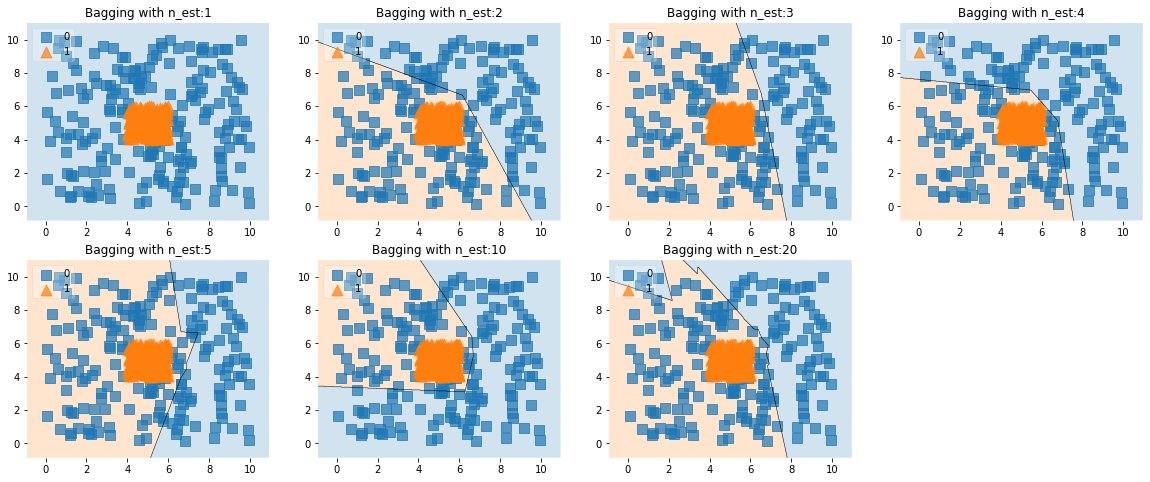

In [93]:
svm_linear = SVC(C=0.5, kernel='linear', gamma = 'auto')
n_est_list = [1,2,3,4,5,10,20]
fig = plt.figure(figsize=(20, 8))
count = 0;
for n_est in n_est_list:
    count = count + 1;
    bagging = BaggingClassifier(base_estimator=svm_linear, n_estimators=n_est)
    bagging.fit(Data3_X, Data3_Y)
    ax = plt.subplot(2,4,count)
    fig = plot_decision_regions(X=Data3_X, y=Data3_Y, clf=bagging, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title('Bagging with n_est:'+str(n_est))
    
plt.show()

<span style="color:red">**Question 7c:** </span>
 Comment on the quality of the decision regions for a bagging classifiers with many estimators when compared to that of only one estimator. 

<span style="color:green">**Answer:** </span> 



<span style="color:red">**Question 7d:** </span>
 **Boosting:**  Create boosting classifiers each with n_estimators = 1,2,3,4,5,10, 20, and 40. Use a **Decision Tree** (with max_depth=2) as a base classifier. Using __Data2__, compute the mean **10-fold** cross validation accuracies and standard deviation for each of the bagging classifiers. State your observations on how boosting affected the mean and standard deviation of the base classifier. 

In [92]:
dt = DecisionTreeClassifier(max_depth=2)
n_est_list = [1,2,3,4,5,10,20,40]
for n_est in n_est_list:
    # create an instance of a boosting classifier with 'n_est' estimators
    boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
    # compute cross-validation accuracy for each bagging classifier
    scores = cross_val_score(boosting, Data2_X, Data2_Y, cv=10, scoring='accuracy')
    print("Mean Boosting Accuracy: %.2f Standard Deviation(+/-): %.2f for estimators: %d" % (scores.mean(), scores.std(), n_est)) 

Mean Boosting Accuracy: 0.88 Standard Deviation(+/-): 0.03 for estimators: 1
Mean Boosting Accuracy: 0.88 Standard Deviation(+/-): 0.03 for estimators: 2
Mean Boosting Accuracy: 0.90 Standard Deviation(+/-): 0.04 for estimators: 3
Mean Boosting Accuracy: 0.90 Standard Deviation(+/-): 0.04 for estimators: 4
Mean Boosting Accuracy: 0.92 Standard Deviation(+/-): 0.03 for estimators: 5
Mean Boosting Accuracy: 0.92 Standard Deviation(+/-): 0.04 for estimators: 10
Mean Boosting Accuracy: 0.91 Standard Deviation(+/-): 0.04 for estimators: 20
Mean Boosting Accuracy: 0.91 Standard Deviation(+/-): 0.02 for estimators: 40


<span style="color:green">**Answer:** </span> The Mean boosting accuracy is highest and standard deviation is least when number of estimators is 5



<span style="color:red">**Question 7e:** </span>
 Plot decision regions for above boosting classifiers. Explain your reason for what may have lead to the observations in __Question 7d__.

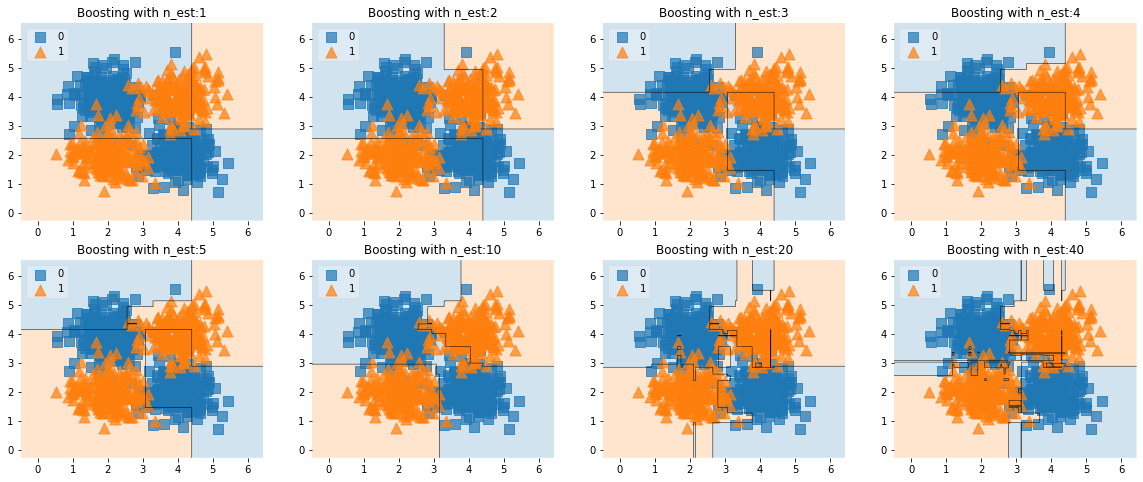

In [91]:
fig = plt.figure(figsize=(20, 8))
count = 0;
for n_est in n_est_list:
    count = count + 1;
    boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
    boosting.fit(Data2_X, Data2_Y)
    ax = plt.subplot(2,4,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=boosting, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title('Boosting with n_est:'+str(n_est))
    
plt.show()

<span style="color:green">**Answer:** </span> 




### 8. Classification on a real-world dataset

Real world datasets typically have many attributes making it hard to visualize. This question is about using SVM and Decision Tree algorithms on a real world 'breast cancer' dataset.

The following code reads the dataset from the 'datasets' library in sklearn.

In [94]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

The features are:

In [95]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Class labels are:

In [96]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Create dataset for classification

In [97]:
X = cancer.data
Y = cancer.target

Number of samples are:

In [98]:
X.shape

(569, 30)

<span style="color:red">**Question 8a:** </span>
 Of all the SVM classifiers you explored in this hands-on exercise (i.e., linear SVM, SVM with a polynomial kernel and RBF kernel), which SVM results in a highest 10-fold cross-validation accuracy on this dataset? Explore the possible parameters for each SVM to determine the best performance for that SVM. For example, when studying linear SVM, explore a range of C values [0.001, 0.01, 0.1, 1]. Similarly for degree consider [1,2]. For gamma, consider [0.001, 0.01, 0.1, 1, 10, 100].

In [110]:
#Linear SVM
c_list = [0.001,0.01,0.1,1]
for c in c_list:
    # create an instance of a SVM
    svm_linear = SVC(c, kernel='linear')
    #boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
    # compute cross-validation accuracy
    scores = cross_val_score(svm_linear,X,Y, cv=10, scoring='accuracy')
    print("Accuracy: %.2f ; Standard Deviation(+/-) %.2f" % (scores.mean(), scores.std()))

Accuracy: 0.94 ; Standard Deviation(+/-) 0.03
Accuracy: 0.95 ; Standard Deviation(+/-) 0.03
Accuracy: 0.95 ; Standard Deviation(+/-) 0.02
Accuracy: 0.95 ; Standard Deviation(+/-) 0.02


In [112]:
#Polynomial varying C and degree
c_list = [0.001,0.01,0.1,1]
degree_list = [1,2,3]
for c in c_list:
    for d in degree_list:
        # create an instance of a SVM
        svm_poly = SVC(c,kernel='poly', degree = d, gamma = 'auto')
        # compute cross-validation accuracy
        scores = cross_val_score(svm_poly,X,Y, cv=10, scoring='accuracy')
        print("Accuracy: %.2f ; Standard Deviation(+/-) %.2f " % (scores.mean(), scores.std())) 


Accuracy: 0.93 ; Standard Deviation(+/-) 0.03 
Accuracy: 0.95 ; Standard Deviation(+/-) 0.03 


KeyboardInterrupt: 

In [ ]:
#RBF varying C and gamma
c_list = [0.001,0.01,0.1,1]
#degree_list = [1,2,3]
gamma_list = [0.001, 0.01, 0.1, 1, 10, 100]
for c in c_list:
    #for d in degree_list:
        for g in gamma_list:
            # create an instance of a SVM
            svm_rbf = SVC(c,kernel='rbf', degree = 1, gamma = g)
            # compute cross-validation accuracy
            scores = cross_val_score(svm_rbf,X,Y, cv=10, scoring='accuracy')
            print("Accuracy: %.2f ; Standard Deviation(+/-) %.2f " % (scores.mean(), scores.std())) 

<span style="color:green">**Answer:** </span> 


<span style="color:red">**Question 8b:** </span>
 Similar to __Question 8a__ explore decision trees with different max_depth to determine which values returns the best classifier.

In [ ]:
dt_list = [2,4,6,8,10,20]
for dt in dt_list:
    # create an instance of a SVM
    dt_est=DecisionTreeClassifier(max_depth=dt)
    # compute cross-validation accuracy
    scores = cross_val_score(dt_est,X,Y, cv=10, scoring='accuracy')
    print("Accuracy: %.2f ; Standard Deviation(+/-) %.2f " % (scores.mean(), scores.std())) 

<span style="color:green">**Answer:** </span> 



<span style="color:red">**Question 8c:** </span>
 Imagine a scenario where you are working at a cancer center as a data scientist tasked with identifying the characteristics that distinguish malignant tumors from benign tumors. Based on your knowledge of classification techniques which approach would you use and why?

<span style="color:green">**Answer:** </span> 
